In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# Load dataset
df = pd.read_csv("netflix.csv")

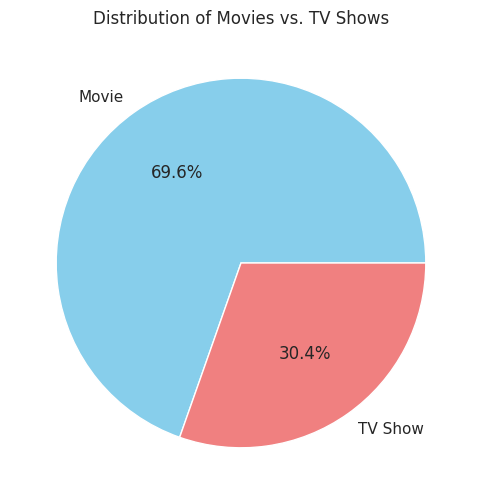

In [9]:
sns.set(style="darkgrid")

plt.figure(figsize=(6, 6))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Distribution of Movies vs. TV Shows")
plt.ylabel("")
plt.show()

<ipython-input-5-66b7b4674afa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


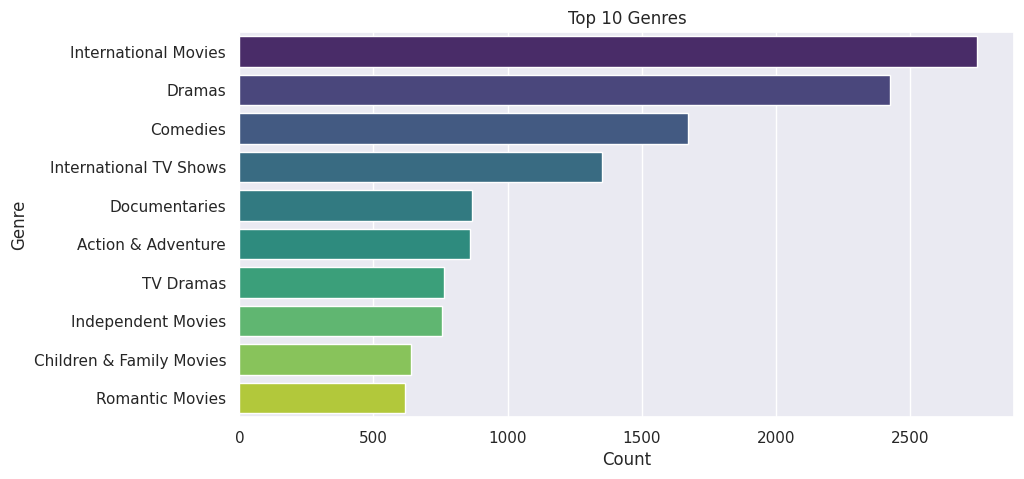

In [5]:
plt.figure(figsize=(10, 5))
genre_counts = df['listed_in'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Top 10 Genres")
plt.show()


<ipython-input-6-364b3f93bd26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette='coolwarm')


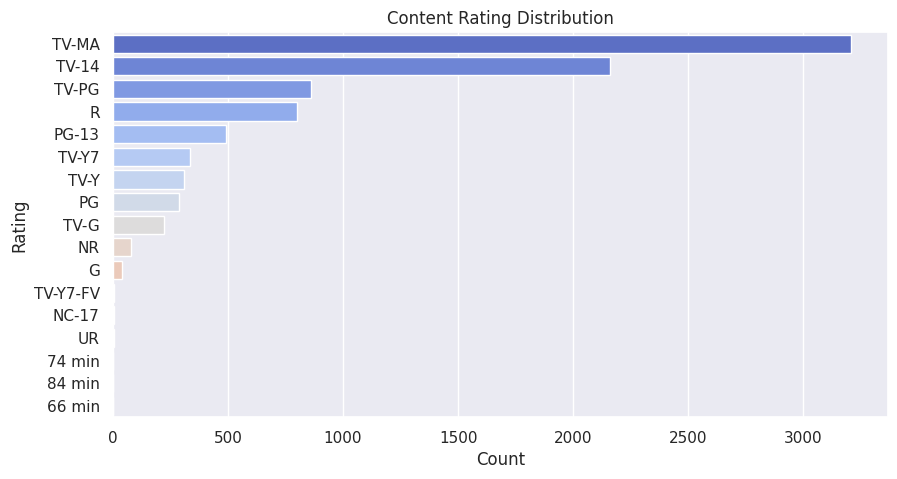

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette='coolwarm')
plt.xlabel("Count")
plt.ylabel("Rating")
plt.title("Content Rating Distribution")
plt.show()

<ipython-input-7-8744d5ddf702>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.replace(" min", "").astype(float)


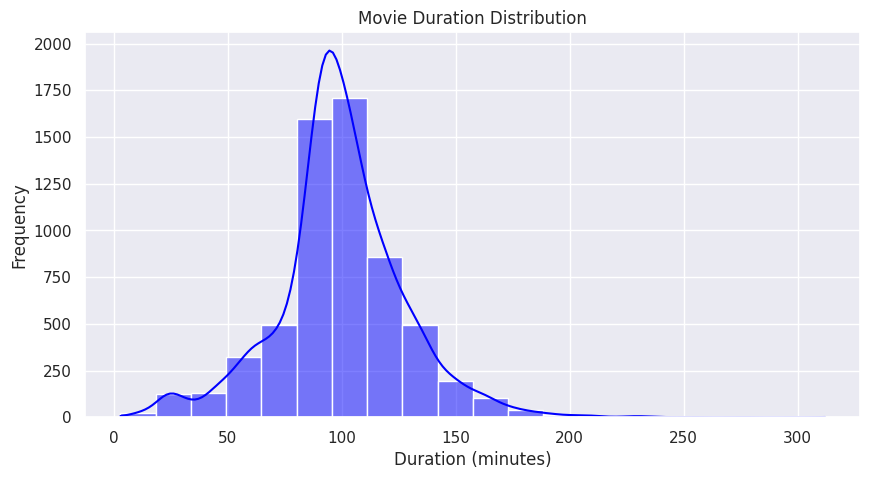

In [7]:
df_movies = df[df['type'] == 'Movie']
df_movies['duration'] = df_movies['duration'].str.replace(" min", "").astype(float)
plt.figure(figsize=(10, 5))
sns.histplot(df_movies['duration'], bins=20, kde=True, color='blue')
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Movie Duration Distribution")
plt.show()

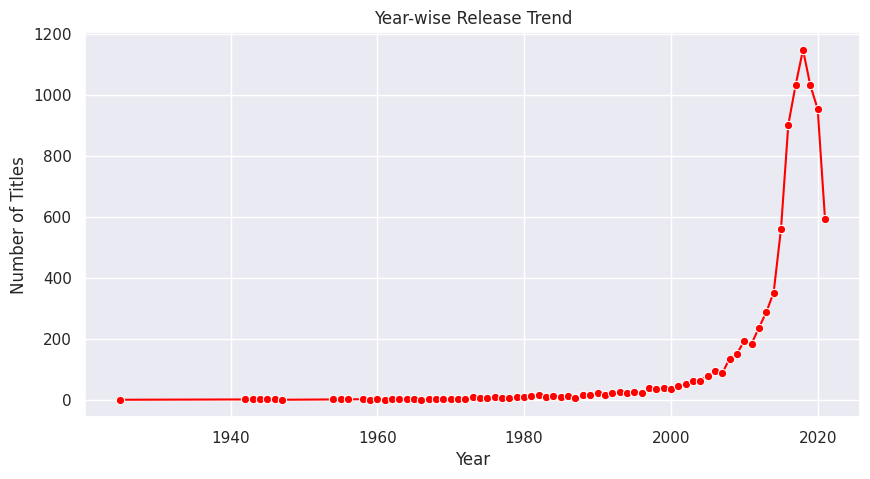

In [8]:
plt.figure(figsize=(10, 5))
year_counts = df['release_year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='red')
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Year-wise Release Trend")
plt.show()

<ipython-input-11-97714b7f9698>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')


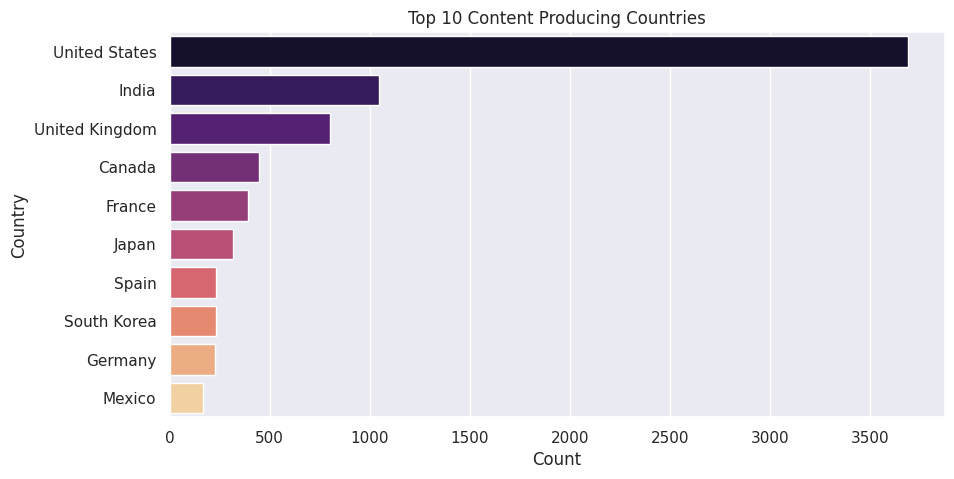

In [11]:
plt.figure(figsize=(10, 5))
country_counts = df['country'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='magma')
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 10 Content Producing Countries")
plt.show()

<ipython-input-12-fc0bdbc65fd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette='cubehelix')


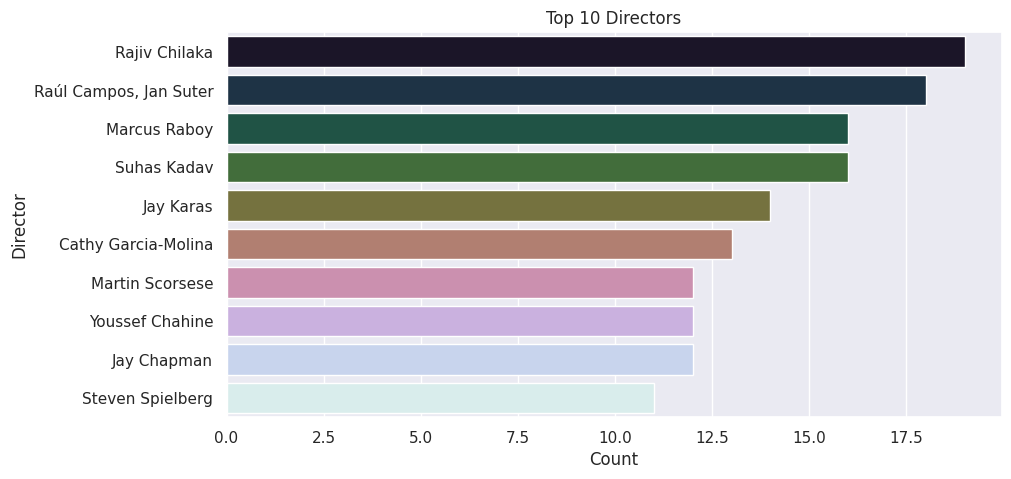

In [12]:
plt.figure(figsize=(10, 5))
director_counts = df['director'].dropna().value_counts().head(10)
sns.barplot(x=director_counts.values, y=director_counts.index, palette='cubehelix')
plt.xlabel("Count")
plt.ylabel("Director")
plt.title("Top 10 Directors")
plt.show()

<ipython-input-13-d1b9342acf4b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='plasma')


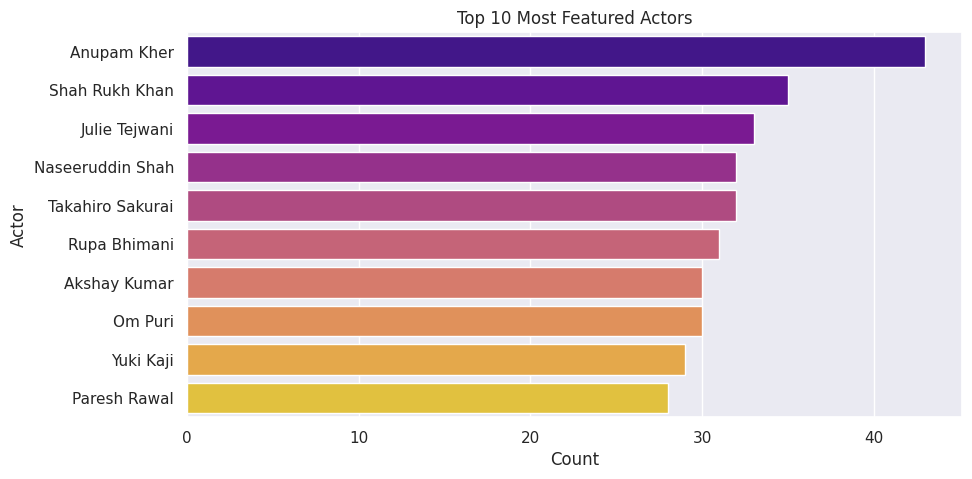

In [13]:
plt.figure(figsize=(10, 5))
actor_counts = df['cast'].dropna().str.split(', ').explode().value_counts().head(10)
sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='plasma')
plt.xlabel("Count")
plt.ylabel("Actor")
plt.title("Top 10 Most Featured Actors")
plt.show()

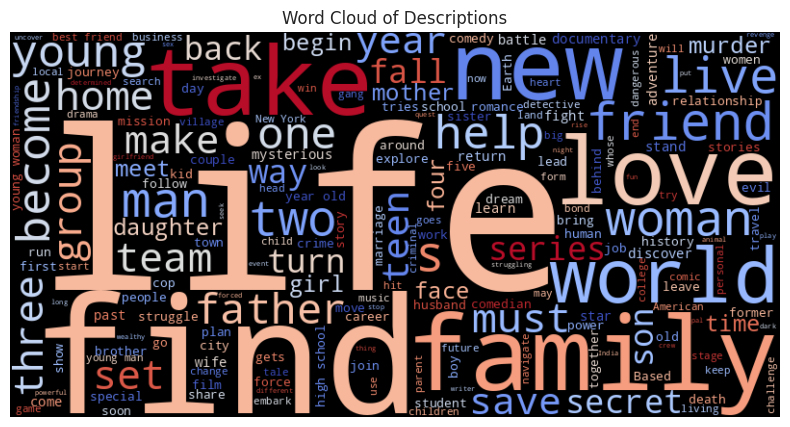

In [14]:
text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='coolwarm').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Descriptions")
plt.show()

<ipython-input-15-1781f8cb01c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['seasons'] = df_tv['duration'].str.replace(" Season", "").str.replace("s", "").astype(int)


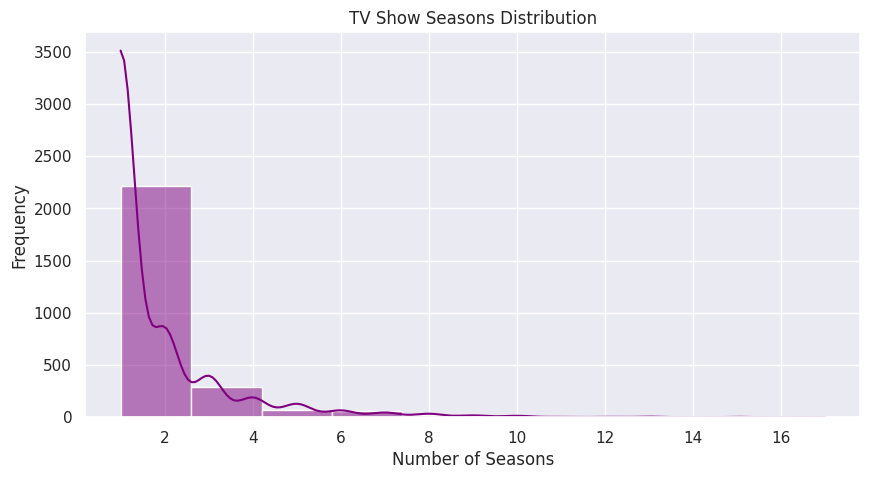

In [15]:
df_tv = df[df['type'] == 'TV Show']
df_tv['seasons'] = df_tv['duration'].str.replace(" Season", "").str.replace("s", "").astype(int)
plt.figure(figsize=(10, 5))
sns.histplot(df_tv['seasons'], bins=10, kde=True, color='purple')
plt.xlabel("Number of Seasons")
plt.ylabel("Frequency")
plt.title("TV Show Seasons Distribution")
plt.show()